In [132]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [133]:
df = pd.read_excel('Copy of AIA Compliance Technical Assessment_July 1, 2023_13.52 company name hidden.xlsx', skiprows=[1])

df.head()

,StartDate,EndDate,Status,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,DistributionChannel,UserLanguage,...,Q122,Q123,Q124,Q125,Q126,Q127,Q128,Q128_6_TEXT,Q129,Q8
0,2023-05-11 07:08:57,2023-05-11 07:39:37,0,100,1839,1,2023-05-11 07:39:38.143,R_3QJMMTA24YX2yVg,anonymous,EN,...,5.0,1.0,1.0,1.0,4.0,1.0,3,NaN,4.0,NaN
1,2023-05-11 09:06:25,2023-05-11 09:33:34,0,100,1629,1,2023-05-11 09:33:36.779,R_31hoIANMOQfACE2,anonymous,EN,...,1.0,1.0,1.0,1.0,3.0,2.0,"1,3,4,6",management,4.0,NaN
2,2023-05-22 04:44:00,2023-05-22 05:05:05,0,100,1264,1,2023-05-22 05:05:07.760,R_e9XbZplwgOLxZbX,anonymous,EN,...,3.0,1.0,1.0,1.0,2.0,2.0,"1,2,3,4",NaN,5.0,NaN
3,2023-05-22 09:20:53,2023-05-22 10:07:53,0,100,2820,1,2023-05-22 10:07:55.874,R_1KwOOSISIYqCkoY,anonymous,EN,...,3.0,1.0,1.0,2.0,4.0,2.0,6,Everyone for which is relevant.,5.0,NaN
4,2023-05-23 03:04:36,2023-05-23 03:31:43,0,100,1626,1,2023-05-23 03:31:45.618,R_24H0svxSkVTsGZQ,anonymous,EN,...,4.0,1.0,1.0,2.0,5.0,1.0,"1,3,4,6",management & board,5.0,NaN


In [134]:
#dropping columns we don't need
df.drop(['StartDate','EndDate','Status','Progress','Duration (in seconds)','Finished','RecordedDate','ResponseId','DistributionChannel','UserLanguage','Q132','Q149','Q5', 'Q5_4_TEXT', 'Q9', 'Q9_5_TEXT', 'Q7', 'Q10', 'Q22_NPS_GROUP', 'Q22', 'Q23_NPS_GROUP', 'Q23', 'Q16_NPS_GROUP', 'Q16', 'Q17', 'Q18_NPS_GROUP', 'Q18', 'Q19', 'Q20', 'Q25_NPS_GROUP', 'Q25'], axis=1)

,Q1,Q6,Q28,Q29,Q80,Q32,Q33,Q79,Q35,Q35_2_TEXT,...,Q122,Q123,Q124,Q125,Q126,Q127,Q128,Q128_6_TEXT,Q129,Q8
0,Company 1,1,2.0,4.0,5.0,2.0,1.0,5.0,2.0,We mostly use encrypted data but in a certain ...,...,5.0,1.0,1.0,1.0,4.0,1.0,3,NaN,4.0,NaN
1,Company 2,1,2.0,2.0,4.0,1.0,1.0,4.0,2.0,bad encryption of customer information,...,1.0,1.0,1.0,1.0,3.0,2.0,"1,3,4,6",management,4.0,NaN
2,Company 3,1,2.0,4.0,5.0,4.0,4.0,4.0,1.0,NaN,...,3.0,1.0,1.0,1.0,2.0,2.0,"1,2,3,4",NaN,5.0,NaN
3,Company 4,4,2.0,2.0,5.0,2.0,2.0,4.0,2.0,We operate with a lot of partial information.,...,3.0,1.0,1.0,2.0,4.0,2.0,6,Everyone for which is relevant.,5.0,NaN
4,Company 5,2,2.0,2.0,5.0,2.0,2.0,5.0,2.0,availability of data due to admenments in agre...,...,4.0,1.0,1.0,2.0,5.0,1.0,"1,3,4,6",management & board,5.0,NaN
5,Company 6,1,1.0,3.0,5.0,1.0,1.0,5.0,2.0,blurring,...,3.0,3.0,3.0,2.0,4.0,2.0,"3,6",mgt,4.0,NaN
6,Company 7,1,2.0,2.0,5.0,2.0,2.0,3.0,1.0,NaN,...,4.0,1.0,1.0,1.0,4.0,1.0,"1,3,4",NaN,5.0,NaN
7,Company 8,1,1.0,4.0,4.0,3.0,1.0,3.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Company 9,4,2.0,1.0,4.0,1.0,1.0,5.0,2.0,GDPR compliance,...,4.0,1.0,1.0,1.0,5.0,1.0,"1,2,3,4",NaN,4.0,NaN
9,Company 10,1,4.0,4.0,4.0,4.0,1.0,4.0,3.0,NaN,...,4.0,1.0,4.0,1.0,4.0,2.0,"2,4",NaN,4.0,NaN


Standardizing all questions (Pip, Jelle and Sven)

In [135]:
#type 1
df.loc[df["Q28"] == 1, "Q28"] = 0.75
df.loc[df["Q28"] == 2, "Q28"] = 1
df.loc[df["Q28"] == 3, "Q28"] = 0.25
df.loc[df["Q28"] == 4, "Q28"] = 0.5
df.loc[df["Q28"] == 5, "Q28"] = 0


#type 2 
#Create a list of column names you want to work with
columns_to_standardize_type_2 = ['Q29', 'Q32', 'Q33', 'Q36', 'Q41', 'Q46', 'Q47', 'Q50', 'Q51', 'Q55', 'Q58', 'Q84', 'Q93', 'Q95', 'Q96', 'Q98', 'Q105', 'Q108', 'Q107', 'Q121', 'Q123', 'Q124', 'Q127']

# Initialize the MinMaxScaler
rescaled = MinMaxScaler()

# Apply the scaling to the specified columns
df[columns_to_standardize_type_2] = 1 - rescaled.fit_transform(df[columns_to_standardize_type_2].values)


# type 3, standardization 
columns_to_standardize_type_3 = ['Q80','Q79','Q78','Q77','Q75','Q76','Q74','Q73','Q71','Q70','Q69','Q68','Q67','Q66','Q87','Q90','Q94','Q97','Q99','Q104','Q110','Q111','Q122','Q124','Q126','Q129']
df[columns_to_standardize_type_3] = df[columns_to_standardize_type_3]/ 5


#type 4
df.loc[df["Q35"] == 1, "Q35"] = 0
df.loc[df["Q35"] == 2, "Q35"] = 1
df.loc[df["Q35"] == 3, "Q35"] = 0.5


#type 5
df.loc[df["Q37"] == 1, "Q37"] = 0.25
df.loc[df["Q37"] == 2, "Q37"] = 0.5
df.loc[df["Q37"] == 3, "Q37"] = 0.75
df.loc[df["Q37"] == 4, "Q37"] = 0
df.loc[df["Q37"] == 5, "Q37"] = 1


#type 6
columns_to_standardize_type_6 = ['Q39','Q53','Q61','Q85']

for column in columns_to_standardize_type_6:
    df[column] = df[column].str.count('\w+').div(5)

#type 7
df.loc[df["Q42"] == 6, "Q42"] = 0
df["Q42"] = np.where(df["Q42"] == '5' , 0, df['Q42'].str.count('\w+')/5)

df.loc[df["Q48"] == 6, "Q48"] = 0
df["Q48"] = np.where(df["Q48"] == '5' , 0, df['Q48'].str.count('\w+')/5)

# Type 8
df.loc[df["Q45"] == 1, "Q45"] = 1
df.loc[df["Q45"] == 2, "Q45"] = 0.5
df.loc[df["Q45"] == 3, "Q45"] = 0

df.loc[df["Q118"] == 1, "Q118"] = 1
df.loc[df["Q118"] == 2, "Q118"] = 0.5
df.loc[df["Q118"] == 3, "Q118"] = 0


#type 9
df.loc[df["Q62"] == 1, "Q62"] = 1
df.loc[df["Q62"] == 2, "Q62"] = 0
df.loc[df["Q62"] == 3, "Q62"] = 0.5

df.loc[df["Q120"] == 1, "Q120"] = 1
df.loc[df["Q120"] == 2, "Q120"] = 0
df.loc[df["Q120"] == 3, "Q120"] = 0.5

# Type 10
columns_to_standardize_type_10 = ['Q63', 'Q86', 'Q106']
df[columns_to_standardize_type_10] = df[columns_to_standardize_type_10].astype(float)
df[columns_to_standardize_type_10] = df[columns_to_standardize_type_10].replace(2, 0)

#type 11
df['Q83'] = 1- rescaled.fit_transform(df['Q83'].values.reshape(-1,1)) 

#type 12
df.loc[df["Q88"] == 1, "Q88"] = 0.5
df.loc[df["Q88"] == 2, "Q88"] = 1
df.loc[df["Q88"] == 3, "Q88"] = 0

#type 13
df.loc[df["Q89"] == 1, "Q89"] = 1
df.loc[df["Q89"] == 2, "Q89"] = 0.8
df.loc[df["Q89"] == 3, "Q89"] = 0.6
df.loc[df["Q89"] == 4, "Q89"] = 0.4
df.loc[df["Q89"] == 5, "Q89"] = 0.2
df.loc[df["Q89"] == 6, "Q89"] = 0

# Type 14
df['Q91'] = df['Q91'].str.count('\w+')/6
df['Q128'] = df['Q128'].str.count('\w+')/6

#type 15
df.loc[df["Q100"] == 1, "Q100"] = 2/3
df.loc[df["Q100"] == 2, "Q100"] = 1
df.loc[df["Q100"] == 3, "Q100"] = 1/3
df.loc[df["Q100"] == 4, "Q100"] = 0

#type 16
df['Q103'] = df['Q103'].str.count('\w+')/4
df['Q109'] = df['Q109'].str.count('\w+')/4
df['Q119'] = df['Q119'].str.count('\w+')/4

#type 17
df.loc[df["Q82"] == 1, "Q82"] = 0.8
df.loc[df["Q82"] == 2, "Q82"] = 0.4
df.loc[df["Q82"] == 3, "Q82"] = 1
df.loc[df["Q82"] == 4, "Q82"] = 0.2
df.loc[df["Q82"] == 5, "Q82"] = 0.6
df.loc[df["Q82"] == 6, "Q82"] = 0

#Q102 (later changes)
df.loc[df["Q102"] == 1, "Q102"] = 1
df.loc[df["Q102"] == 2, "Q102"] = 0.75
df.loc[df["Q102"] == 3, "Q102"] = 0.5
df.loc[df["Q102"] == 4, "Q102"] = 0.25
df.loc[df["Q102"] == 5, "Q102"] = 0


Dividing questions per 5 topics and actvivity/feeling (Otto and Pip)

In [136]:

data_and_model_activity = ['Q28','Q29','Q32','Q33','Q35','Q36','Q37','Q39','Q41','Q42','Q46','Q47','Q48','Q50','Q51','Q53','Q55']
data_and_model_feeling = ['Q80','Q79','Q78','Q77','Q75','Q76','Q45','Q74','Q73','Q71','Q70']

technical_documentation_activity = ['Q58','Q61','Q82','Q83','Q84','Q85','Q88','Q89']
technical_documentation_feeling = ['Q69','Q68','Q62','Q63','Q67','Q66','Q86','Q87','Q90']

user_application_activity = ['Q91','Q93','Q95','Q96','Q98','Q100']
user_application_feeling = ['Q94','Q97','Q99']

model_monitoring_activity = ['Q102','Q103','Q104','Q105','Q108','Q107','Q109']
model_monitoring_feeling = ['Q106','Q110','Q111']

risk_management_activity = ['Q118','Q119','Q121','Q123','Q124','Q125','Q127','Q128']
risk_management_feeling = ['Q120','Q122','Q126','Q129']

In [137]:
df[model_monitoring_activity]

,Q102,Q103,Q104,Q105,Q108,Q107,Q109
0,1.00,0.25,0.8,1.0,1.0,1.0,0.25
1,1.00,0.50,0.8,1.0,0.5,0.5,0.25
2,0.25,0.25,0.2,1.0,1.0,0.5,0.25
3,0.25,0.50,0.8,0.5,1.0,0.0,0.50
4,1.00,0.50,1.0,1.0,0.5,0.5,0.75
5,0.25,0.25,0.4,1.0,0.5,1.0,0.50
6,0.75,0.25,1.0,1.0,0.5,1.0,0.50
7,0.25,0.50,0.6,0.0,NaN,NaN,0.50
8,1.00,0.75,1.0,1.0,1.0,1.0,0.50
9,0.25,0.50,0.8,0.5,0.0,0.5,0.25


In [138]:
# Calculate the mean per row for data and model activity
mean_per_row_dm_act = df[data_and_model_activity].mean(axis=1, skipna=True)

print(mean_per_row_dm_act)

# Create a new column in the DataFrame with the mean values
df['mean_per_row_dm_act'] = mean_per_row_dm_act

0     0.510784
1     0.565686
2     0.179412
3     0.749020
4     0.737255
5     0.593137
6     0.583333
7     0.370238
8     0.694118
9     0.357843
10    0.672549
11    0.423529
12    0.700980
13    0.762745
14    0.476923
15    0.643333
16    0.642593
17    0.598039
18         NaN
19    0.512745
20         NaN
dtype: float64


In [139]:
#Calculate the mean per row for data and model feeling
mean_per_row_dm_feel = df[data_and_model_feeling].mean(axis=1, skipna=True)

print(mean_per_row_dm_feel)

# Create a new column in the DataFrame with the mean values
df['mean_per_row_dm_feel'] = mean_per_row_dm_feel

0     0.809091
1     0.800000
2     0.600000
3     0.909091
4     0.945455
5     0.672727
6     0.854545
7     0.820000
8     0.763636
9     0.781818
10    0.872727
11    1.000000
12    0.981818
13    0.890909
14    0.627273
15    0.900000
16    0.800000
17    0.800000
18         NaN
19    0.718182
20         NaN
dtype: float64


In [140]:
# Calculate the division of "activity" by "feeling" per row
df['data_and_model_exaggeration'] = df['mean_per_row_dm_act'] / df['mean_per_row_dm_feel']

df['data_and_model_exaggeration']

0     0.631306
1     0.707108
2     0.299020
3     0.823922
4     0.779789
5     0.881691
6     0.682624
7     0.451510
8     0.908964
9     0.457706
10    0.770629
11    0.423529
12    0.713962
13    0.856142
14    0.760312
15    0.714815
16    0.803241
17    0.747549
18         NaN
19    0.713949
20         NaN
Name: data_and_model_exaggeration, dtype: float64

In [141]:
# Calculate the mean per row for technical documentation activity
mean_per_row_td_act = df[technical_documentation_activity].mean(axis=1, skipna=True)

print(mean_per_row_td_act)

# Create a new column in the DataFrame with the mean values
df['mean_per_row_td_act'] = mean_per_row_td_act

0     0.393750
1     0.414583
2     0.302083
3     0.306250
4     0.745833
5     0.364583
6     0.733333
7     0.277778
8     0.050000
9     0.725000
10    0.566667
11    0.708333
12    0.529167
13    0.673810
14    0.150000
15    0.766667
16         NaN
17    0.250000
18         NaN
19         NaN
20         NaN
dtype: float64


In [142]:
# Calculate the mean per row for technical documentation feeling
mean_per_row_td_feel = df[technical_documentation_feeling].mean(axis=1, skipna=True)

print(mean_per_row_td_feel)

# Create a new column in the DataFrame with the mean values
df['mean_per_row_td_feel'] = mean_per_row_td_feel

0     0.644444
1     0.555556
2     0.444444
3     0.600000
4     0.822222
5     0.511111
6     0.911111
7     0.500000
8     0.400000
9     0.822222
10    0.722222
11    0.888889
12    0.666667
13    0.611111
14    0.457143
15    0.766667
16         NaN
17    0.400000
18         NaN
19         NaN
20         NaN
dtype: float64


In [143]:
# Calculate the division of "activity" by "feeling" per row
df['technical_documentation_exaggeration'] = df['mean_per_row_td_act'] / df['mean_per_row_td_feel']

df['technical_documentation_exaggeration']

0     0.610991
1     0.746250
2     0.679688
3     0.510417
4     0.907095
5     0.713315
6     0.804878
7     0.555556
8     0.125000
9     0.881757
10    0.784615
11    0.796875
12    0.793750
13    1.102597
14    0.328125
15    1.000000
16         NaN
17    0.625000
18         NaN
19         NaN
20         NaN
Name: technical_documentation_exaggeration, dtype: float64

In [144]:
# Calculate the mean per row for user application activity
mean_per_row_ua_act = df[user_application_activity].mean(axis=1, skipna=True)

print(mean_per_row_ua_act)

# Create a new column in the DataFrame with the mean values
df['mean_per_row_ua_act'] = mean_per_row_ua_act

0     0.666667
1     0.583333
2     0.277778
3     0.638889
4     0.777778
5     0.361111
6     0.611111
7     0.375000
8     0.555556
9     0.500000
10    0.861111
11    0.916667
12    0.805556
13    0.916667
14    0.250000
15    0.583333
16         NaN
17    0.694444
18         NaN
19         NaN
20         NaN
dtype: float64


In [145]:
# Calculate the mean per row for user application feeling
mean_per_row_ua_feel = df[user_application_feeling].mean(axis=1, skipna=True)

print(mean_per_row_ua_feel)

# Create a new column in the DataFrame with the mean values
df['mean_per_row_ua_feel'] = mean_per_row_ua_feel

0     0.866667
1     0.666667
2     0.600000
3     0.800000
4     0.933333
5     0.466667
6     0.733333
7     0.600000
8     0.733333
9     0.666667
10    0.933333
11    1.000000
12    0.933333
13    1.000000
14    0.466667
15    0.800000
16         NaN
17    0.733333
18         NaN
19         NaN
20         NaN
dtype: float64


In [146]:
# Calculate the division of "activity" by "feeling" per row
df['user_application_exaggeration'] = df['mean_per_row_ua_act'] / df['mean_per_row_ua_feel']

df['user_application_exaggeration']

0     0.769231
1     0.875000
2     0.462963
3     0.798611
4     0.833333
5     0.773810
6     0.833333
7     0.625000
8     0.757576
9     0.750000
10    0.922619
11    0.916667
12    0.863095
13    0.916667
14    0.535714
15    0.729167
16         NaN
17    0.946970
18         NaN
19         NaN
20         NaN
Name: user_application_exaggeration, dtype: float64

In [147]:
# Calculate the mean per row for model monitoring activity
mean_per_row_mm_act = df[model_monitoring_activity].mean(axis=1, skipna=True)

print(mean_per_row_mm_act)

# Create a new column in the DataFrame with the mean values
df['mean_per_row_mm_act'] = mean_per_row_mm_act

0     0.757143
1     0.650000
2     0.492857
3     0.507143
4     0.750000
5     0.557143
6     0.714286
7     0.370000
8     0.892857
9     0.400000
10    0.857143
11    0.857143
12    0.785714
13    0.075000
14    0.300000
15    0.642857
16         NaN
17    0.235714
18         NaN
19         NaN
20         NaN
dtype: float64


In [148]:
# Calculate the mean per row for model monitoring feeling
mean_per_row_mm_feel = df[model_monitoring_feeling].mean(axis=1, skipna=True)

print(mean_per_row_mm_feel)

# Create a new column in the DataFrame with the mean values
df['mean_per_row_mm_feel'] = mean_per_row_mm_feel

0     1.000000
1     0.866667
2     0.400000
3     0.600000
4     0.600000
5     0.600000
6     0.800000
7     0.600000
8     0.933333
9     0.600000
10    0.466667
11    1.000000
12    0.666667
13    0.500000
14    0.466667
15    0.600000
16         NaN
17    0.600000
18         NaN
19         NaN
20         NaN
dtype: float64


Calculating the exaggeration score by dividing "activity" by "feeling" per row (Otto and Pip)

In [149]:
# Calculate the exaggeration score by dividing "activity" by "feeling" per row
df['model_monitoring_exaggeration'] = df['mean_per_row_mm_act'] / df['mean_per_row_mm_feel']

df['model_monitoring_exaggeration']

0     0.757143
1     0.750000
2     1.232143
3     0.845238
4     1.250000
5     0.928571
6     0.892857
7     0.616667
8     0.956633
9     0.666667
10    1.836735
11    0.857143
12    1.178571
13    0.150000
14    0.642857
15    1.071429
16         NaN
17    0.392857
18         NaN
19         NaN
20         NaN
Name: model_monitoring_exaggeration, dtype: float64

In [150]:
# Calculate the mean per row for risk management activity
mean_per_row_rm_act = df[risk_management_activity].mean(axis=1, skipna=True)
print(mean_per_row_rm_act)

# Create a new column in the DataFrame with the mean values
df['mean_per_row_rm_act'] = mean_per_row_rm_act

0     0.702083
1     0.545833
2     0.587500
3     0.650000
4     0.910417
5     0.539583
6     0.806250
7     1.000000
8     0.795833
9     0.520833
10    0.754167
11    0.775000
12    0.764583
13    0.588095
14    0.000000
15    0.712500
16         NaN
17    0.639583
18         NaN
19         NaN
20         NaN
dtype: float64


In [151]:
# Calculate the mean per row for risk management feeling
mean_per_row_rm_feel = df[risk_management_feeling].mean(axis=1, skipna=True)

print(mean_per_row_rm_feel)

# Create a new column in the DataFrame with the mean values
df['mean_per_row_rm_feel'] = mean_per_row_rm_feel

0     0.900000
1     0.400000
2     0.625000
3     0.725000
4     0.825000
5     0.675000
6     0.650000
7          NaN
8     0.900000
9     0.850000
10    0.775000
11    1.000000
12    1.000000
13    0.866667
14    0.500000
15    0.950000
16         NaN
17    0.525000
18         NaN
19         NaN
20         NaN
dtype: float64


In [152]:
# Calculate the division of "activity" by "feeling" per row
df['risk_management_exaggeration'] = df['mean_per_row_rm_act'] / df['mean_per_row_rm_feel']

df['risk_management_exaggeration']

0     0.780093
1     1.364583
2     0.940000
3     0.896552
4     1.103535
5     0.799383
6     1.240385
7          NaN
8     0.884259
9     0.612745
10    0.973118
11    0.775000
12    0.764583
13    0.678571
14    0.000000
15    0.750000
16         NaN
17    1.218254
18         NaN
19         NaN
20         NaN
Name: risk_management_exaggeration, dtype: float64

In [153]:
df.head()

,StartDate,EndDate,Status,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,DistributionChannel,UserLanguage,...,technical_documentation_exaggeration,mean_per_row_ua_act,mean_per_row_ua_feel,user_application_exaggeration,mean_per_row_mm_act,mean_per_row_mm_feel,model_monitoring_exaggeration,mean_per_row_rm_act,mean_per_row_rm_feel,risk_management_exaggeration
0,2023-05-11 07:08:57,2023-05-11 07:39:37,0,100,1839,1,2023-05-11 07:39:38.143,R_3QJMMTA24YX2yVg,anonymous,EN,...,0.610991,0.666667,0.866667,0.769231,0.757143,1.000000,0.757143,0.702083,0.900,0.780093
1,2023-05-11 09:06:25,2023-05-11 09:33:34,0,100,1629,1,2023-05-11 09:33:36.779,R_31hoIANMOQfACE2,anonymous,EN,...,0.746250,0.583333,0.666667,0.875000,0.650000,0.866667,0.750000,0.545833,0.400,1.364583
2,2023-05-22 04:44:00,2023-05-22 05:05:05,0,100,1264,1,2023-05-22 05:05:07.760,R_e9XbZplwgOLxZbX,anonymous,EN,...,0.679688,0.277778,0.600000,0.462963,0.492857,0.400000,1.232143,0.587500,0.625,0.940000
3,2023-05-22 09:20:53,2023-05-22 10:07:53,0,100,2820,1,2023-05-22 10:07:55.874,R_1KwOOSISIYqCkoY,anonymous,EN,...,0.510417,0.638889,0.800000,0.798611,0.507143,0.600000,0.845238,0.650000,0.725,0.896552
4,2023-05-23 03:04:36,2023-05-23 03:31:43,0,100,1626,1,2023-05-23 03:31:45.618,R_24H0svxSkVTsGZQ,anonymous,EN,...,0.907095,0.777778,0.933333,0.833333,0.750000,0.600000,1.250000,0.910417,0.825,1.103535


Adding weights to the exaggeration columns (Otto and Pip)

In [154]:
#creating weights 
weights = {
    'data_and_model_exaggeration': 3,
    'technical_documentation_exaggeration': 3,
    'user_application_exaggeration': 1,
    'model_monitoring_exaggeration': 2,
    'risk_management_exaggeration': 1
}

# Multiply each exaggeration score by its corresponding weight
for topic, weight in weights.items():
    new_column_name = topic + '_weighted'
    df[new_column_name] = df[topic] * weight

df.head()

,StartDate,EndDate,Status,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,DistributionChannel,UserLanguage,...,mean_per_row_mm_feel,model_monitoring_exaggeration,mean_per_row_rm_act,mean_per_row_rm_feel,risk_management_exaggeration,data_and_model_exaggeration_weighted,technical_documentation_exaggeration_weighted,user_application_exaggeration_weighted,model_monitoring_exaggeration_weighted,risk_management_exaggeration_weighted
0,2023-05-11 07:08:57,2023-05-11 07:39:37,0,100,1839,1,2023-05-11 07:39:38.143,R_3QJMMTA24YX2yVg,anonymous,EN,...,1.000000,0.757143,0.702083,0.900,0.780093,1.893919,1.832974,0.769231,1.514286,0.780093
1,2023-05-11 09:06:25,2023-05-11 09:33:34,0,100,1629,1,2023-05-11 09:33:36.779,R_31hoIANMOQfACE2,anonymous,EN,...,0.866667,0.750000,0.545833,0.400,1.364583,2.121324,2.238750,0.875000,1.500000,1.364583
2,2023-05-22 04:44:00,2023-05-22 05:05:05,0,100,1264,1,2023-05-22 05:05:07.760,R_e9XbZplwgOLxZbX,anonymous,EN,...,0.400000,1.232143,0.587500,0.625,0.940000,0.897059,2.039062,0.462963,2.464286,0.940000
3,2023-05-22 09:20:53,2023-05-22 10:07:53,0,100,2820,1,2023-05-22 10:07:55.874,R_1KwOOSISIYqCkoY,anonymous,EN,...,0.600000,0.845238,0.650000,0.725,0.896552,2.471765,1.531250,0.798611,1.690476,0.896552
4,2023-05-23 03:04:36,2023-05-23 03:31:43,0,100,1626,1,2023-05-23 03:31:45.618,R_24H0svxSkVTsGZQ,anonymous,EN,...,0.600000,1.250000,0.910417,0.825,1.103535,2.339367,2.721284,0.833333,2.500000,1.103535


Creating a heatmap of the normal vs weighted scores (Otto and Pip)

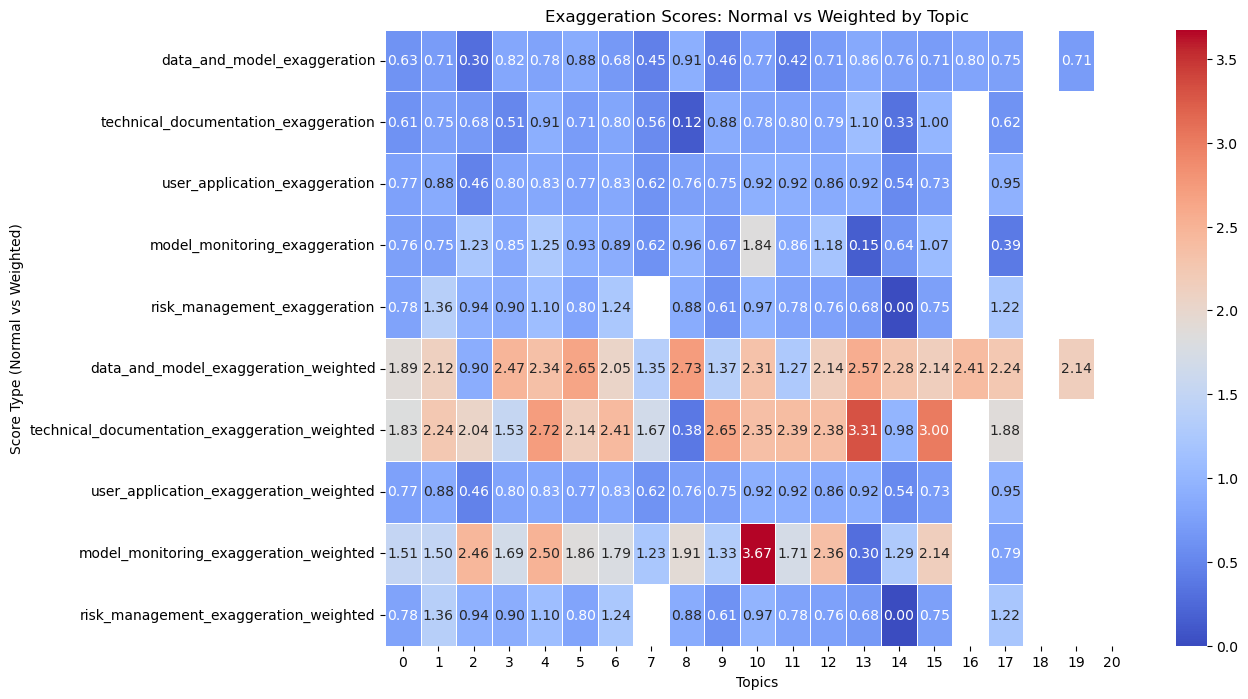

In [155]:
normal_columns = ['data_and_model_exaggeration', 'technical_documentation_exaggeration', 'user_application_exaggeration','model_monitoring_exaggeration','risk_management_exaggeration']
weighted_columns = ['data_and_model_exaggeration_weighted', 'technical_documentation_exaggeration_weighted', 'user_application_exaggeration_weighted','model_monitoring_exaggeration_weighted','risk_management_exaggeration_weighted']

# Select the relevant columns for the heatmap
heatmap_data = df[normal_columns + weighted_columns]

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data.transpose(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Exaggeration Scores: Normal vs Weighted by Topic')
plt.xlabel('Topics')
plt.ylabel('Score Type (Normal vs Weighted)')

plt.show()

### Comparing differences between topics exaggeration score (Sven + Jelle)

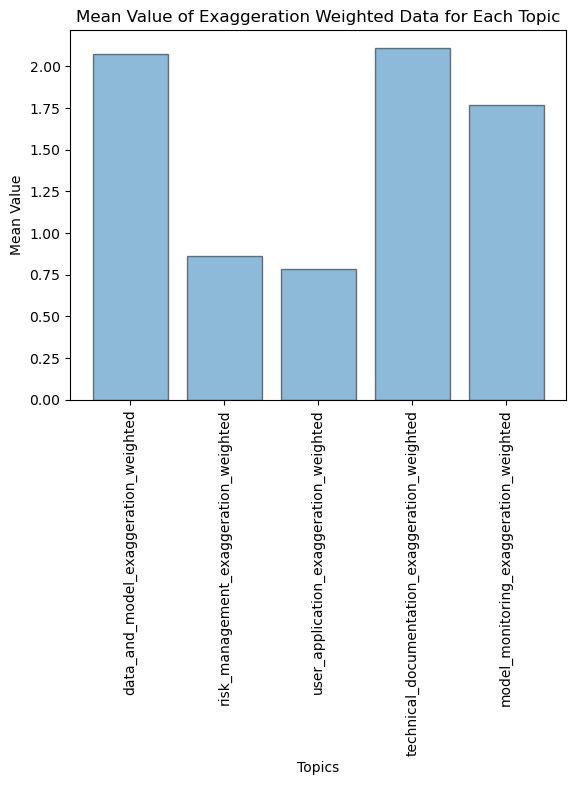

In [156]:
# Example data
data_columns = [
    'data_and_model_exaggeration_weighted',
    'risk_management_exaggeration_weighted',
    'user_application_exaggeration_weighted',
    'technical_documentation_exaggeration_weighted',
    'model_monitoring_exaggeration_weighted'
]

# Calculate the mean for each column
mean_values = [df[column].mean() for column in data_columns]

# Set up positions for the bars
bar_positions = range(len(data_columns))

# Plot a bar for each mean value
plt.bar(bar_positions, mean_values, edgecolor='k', alpha=0.5)

# Add labels and a title
plt.xlabel('Topics')
plt.ylabel('Mean Value')
plt.title('Mean Value of Exaggeration Weighted Data for Each Topic')

# Rotate x-axis labels vertically
plt.xticks(bar_positions, data_columns, rotation='vertical')

# Show the plot
plt.show()

In [157]:
# Delete NaN-values
df_no_nan = df.dropna(subset=[
    'data_and_model_exaggeration_weighted',
    'risk_management_exaggeration_weighted',
    'user_application_exaggeration_weighted',
    'technical_documentation_exaggeration_weighted'
])

# ANOVA
result = f_oneway(
    df_no_nan['data_and_model_exaggeration_weighted'],
    df_no_nan['risk_management_exaggeration_weighted'],
    df_no_nan['user_application_exaggeration_weighted'],
    df_no_nan['model_monitoring_exaggeration_weighted'],
    df_no_nan['technical_documentation_exaggeration_weighted']
)

# Results
print("ANOVA Resultaten:")
print("F-statistic:", result.statistic)
print("P-value:", result.pvalue)

# Print values
alpha = 0.05
if result.pvalue < alpha:
    print("Er is een significant verschil gevonden tussen de groepen op het 95% betrouwbaarheidsniveau.")
else:
    print("Er is geen significant verschil gevonden tussen de groepen op het 95% betrouwbaarheidsniveau.")

ANOVA Resultaten:
F-statistic: 23.40893282218669
P-value: 1.390217374086671e-12
Er is een significant verschil gevonden tussen de groepen op het 95% betrouwbaarheidsniveau.


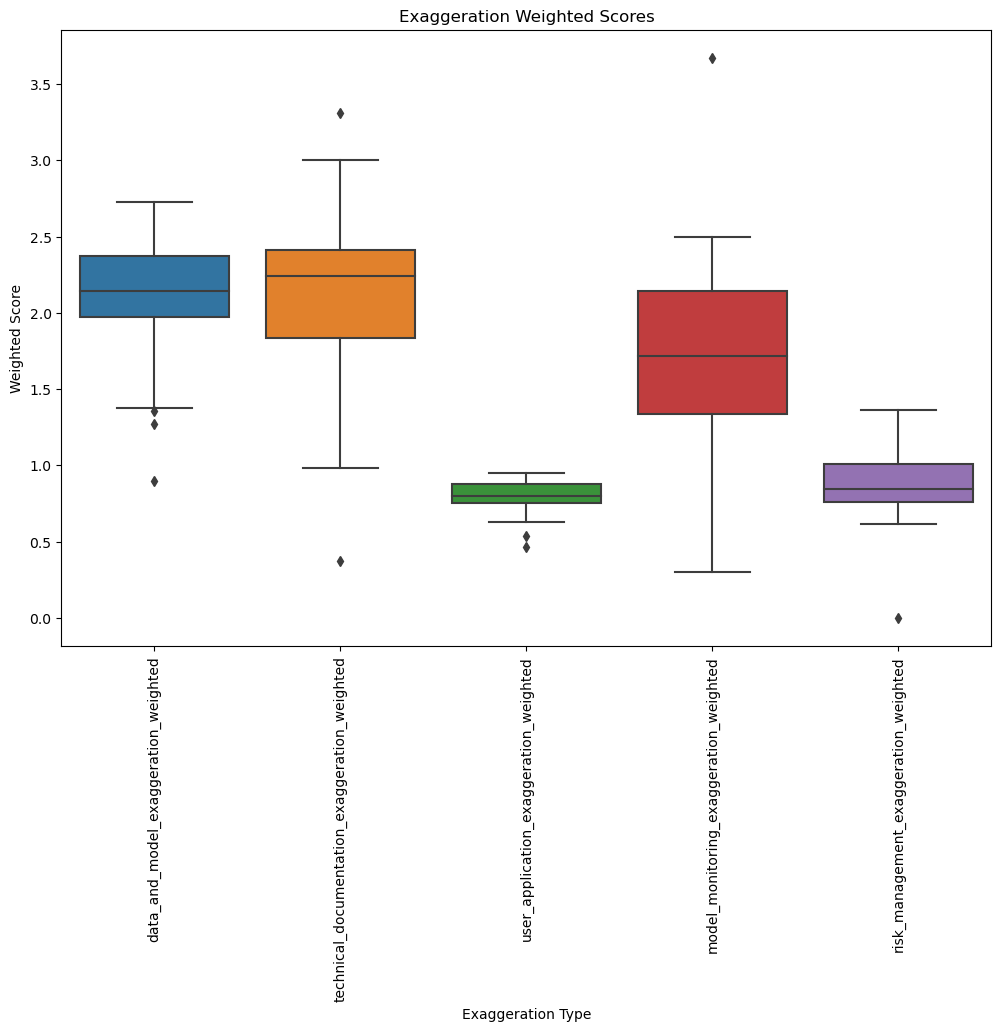

In [158]:
# Select columns
selected_columns = [
    'data_and_model_exaggeration_weighted',
    'technical_documentation_exaggeration_weighted',
    'user_application_exaggeration_weighted',
    'model_monitoring_exaggeration_weighted',
    'risk_management_exaggeration_weighted'
]

# Make a boxplot
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=df[selected_columns])

# Turn the text sideways with 90 degrees and give the names
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.title('Exaggeration Weighted Scores')
plt.xlabel('Exaggeration Type')
plt.ylabel('Weighted Score')

plt.show()




### Differences between smaller and bigger companies and their axeggeration score (Sven & Jelle)

In [159]:
# Standardize smalle and big company
df.loc[df["Q6"] == 1, "Q6"] = 1
df.loc[df["Q6"] == 2, "Q6"] = 1
df.loc[df["Q6"] == 3, "Q6"] = 2
df.loc[df["Q6"] == 4, "Q6"] = 2

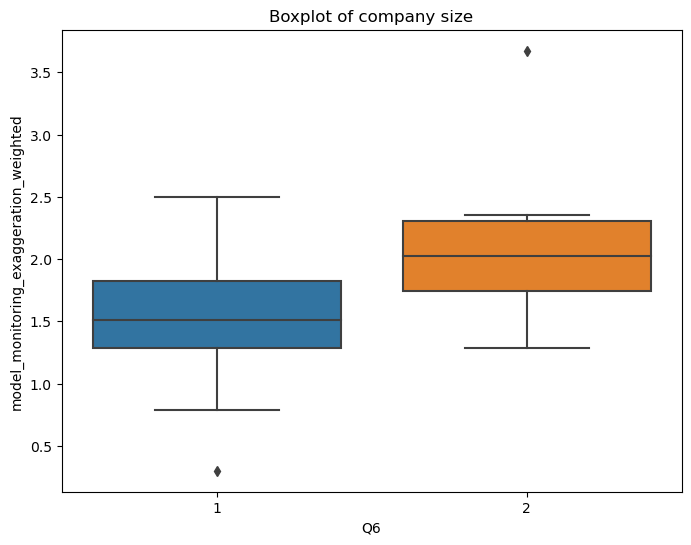

In [160]:
# Plot the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Q6', y='model_monitoring_exaggeration_weighted', data=df)

# Add labels and a title
plt.xlabel('Q6')
plt.ylabel('model_monitoring_exaggeration_weighted')
plt.title('Boxplot of company size')

# Show the boxplot
plt.show()

In [161]:
### Paired Sample T-test
#H0: The mean difference between a small company(1) and a big company(2) is equal to 0.
#HA: The mean difference between a small company(1) and a big company(2) is not equal to 0.

In [162]:
# Separate data for small and large companies
small_company = df[df['Q6'] == 1]['model_monitoring_exaggeration_weighted']
large_company = df[df['Q6'] == 2]['model_monitoring_exaggeration_weighted']

# Welch's t-test ignoring NaNs
t_statistic, p_value = ttest_ind(small_company, large_company, equal_var=False, nan_policy='omit')

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpretation of the result
alpha = 0.05
if p_value < alpha:
    print("The difference between small and large companies is statistically significant.")
else:
    print("No significant difference was found between small and large companies.")


T-statistic: -1.6297526372931235
P-value: 0.13960651416099262
No significant difference was found between small and large companies.


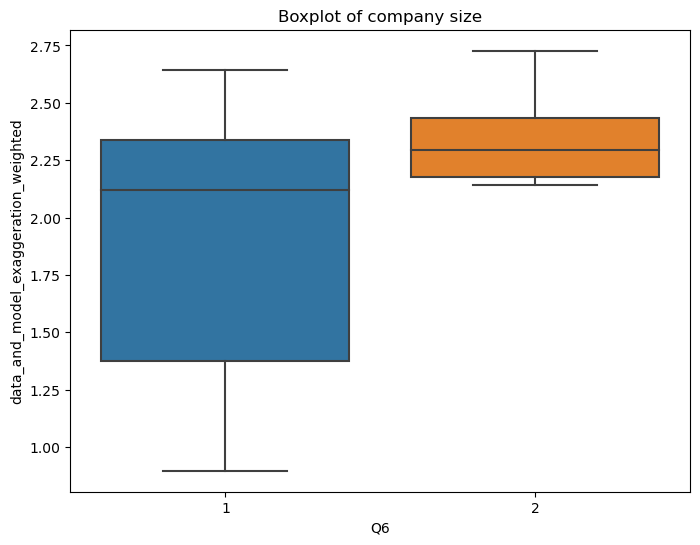

In [174]:
# Plot the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Q6', y='data_and_model_exaggeration_weighted', data=df)

# Add labels and a title
plt.xlabel('Q6')
plt.ylabel('data_and_model_exaggeration_weighted')
plt.title('Boxplot of company size')

# Show the boxplot
plt.show()

In [164]:
# Separate data for small and large companies
small_company = df[df['Q6'] == 1]['data_and_model_exaggeration_weighted']
large_company = df[df['Q6'] == 2]['data_and_model_exaggeration_weighted']

# Welch's t-test ignoring NaNs
t_statistic, p_value = ttest_ind(small_company, large_company, equal_var=False, nan_policy='omit')

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpretation of the result
alpha = 0.05
if p_value < alpha:
    print("The difference between small and large companies is statistically significant.")
else:
    print("No significant difference was found between small and large companies.")


T-statistic: -2.245540429731157
P-value: 0.03839325298127274
The difference between small and large companies is statistically significant.


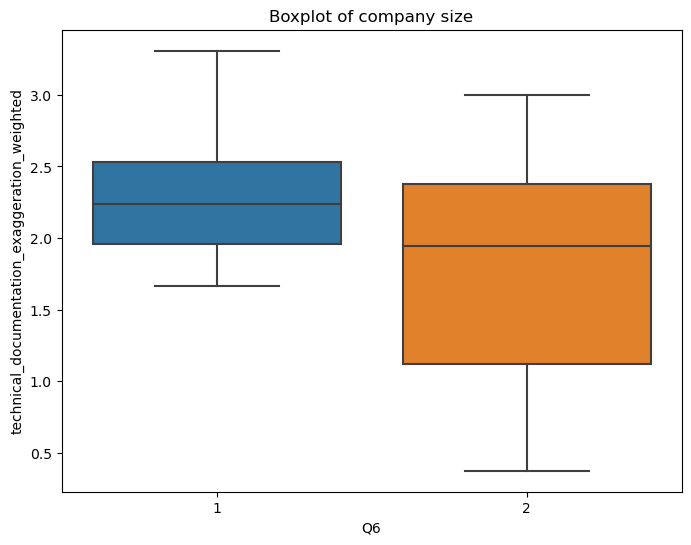

In [165]:
# Plot the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Q6', y='technical_documentation_exaggeration_weighted', data=df)

# Add labels and a title
plt.xlabel('Q6')
plt.ylabel('technical_documentation_exaggeration_weighted')
plt.title('Boxplot of company size')

# Show the boxplot
plt.show()

In [166]:
# Separate data for small and large companies
small_company = df[df['Q6'] == 1]['technical_documentation_exaggeration_weighted']
large_company = df[df['Q6'] == 2]['technical_documentation_exaggeration_weighted']

# Welch's t-test ignoring NaNs
t_statistic, p_value = ttest_ind(small_company, large_company, equal_var=False, nan_policy='omit')

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpretation of the result
alpha = 0.05
if p_value < alpha:
    print("The difference between small and large companies is statistically significant.")
else:
    print("No significant difference was found between small and large companies.")


T-statistic: 1.2345833167945024
P-value: 0.2611474346051585
No significant difference was found between small and large companies.


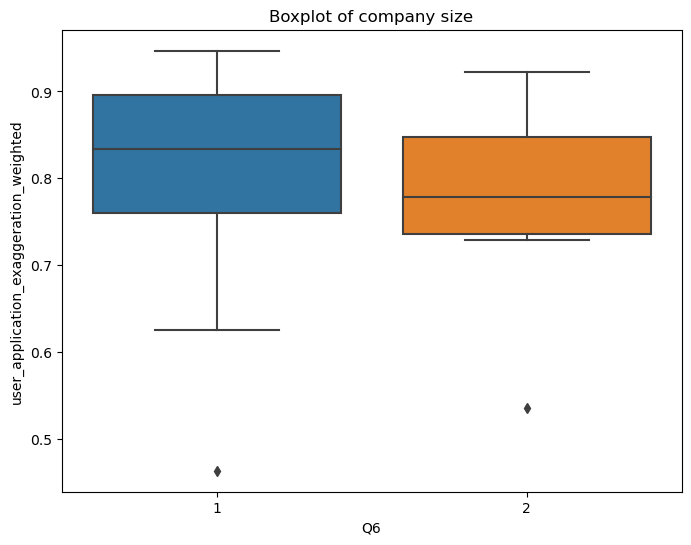

In [167]:
# Plot the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Q6', y='user_application_exaggeration_weighted', data=df)

# Add labels and a title
plt.xlabel('Q6')
plt.ylabel('user_application_exaggeration_weighted')
plt.title('Boxplot of company size')

# Show the boxplot
plt.show()

In [168]:
# Separate data for small and large companies
small_company = df[df['Q6'] == 1]['user_application_exaggeration_weighted']
large_company = df[df['Q6'] == 2]['user_application_exaggeration_weighted']

# Welch's t-test ignoring NaNs
t_statistic, p_value = ttest_ind(small_company, large_company, equal_var=False, nan_policy='omit')

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpretation of the result
alpha = 0.05
if p_value < alpha:
    print("The difference between small and large companies is statistically significant.")
else:
    print("No significant difference was found between small and large companies.")


T-statistic: 0.3361649644490796
P-value: 0.7430571852318104
No significant difference was found between small and large companies.


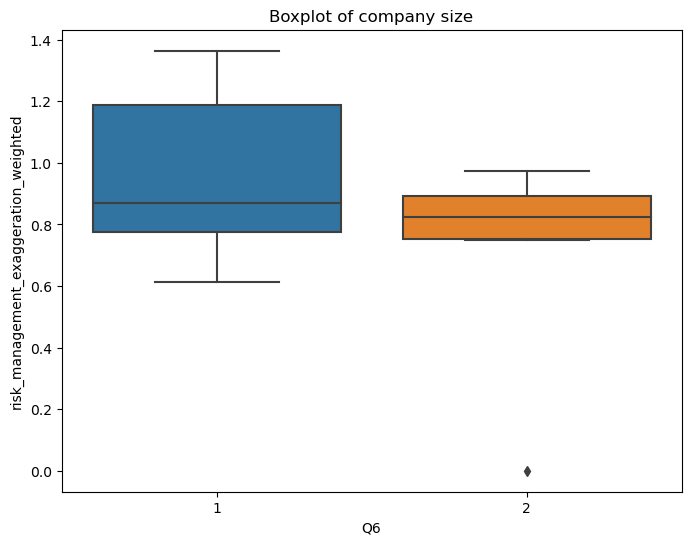

In [169]:
# Plot the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Q6', y='risk_management_exaggeration_weighted', data=df)

# Add labels and a title
plt.xlabel('Q6')
plt.ylabel('risk_management_exaggeration_weighted')
plt.title('Boxplot of company size')

# Show the boxplot
plt.show()

In [170]:
# Separate data for small and large companies
small_company = df[df['Q6'] == 1]['risk_management_exaggeration_weighted']
large_company = df[df['Q6'] == 2]['risk_management_exaggeration_weighted']

# Welch's t-test ignoring NaNs
t_statistic, p_value = ttest_ind(small_company, large_company, equal_var=False, nan_policy='omit')

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpretation of the result
alpha = 0.05
if p_value < alpha:
    print("The difference between small and large companies is statistically significant.")
else:
    print("No significant difference was found between small and large companies.")


T-statistic: 1.424667918374845
P-value: 0.1909049328101756
No significant difference was found between small and large companies.


In [171]:

selected_columns = ['data_and_model_exaggeration_weighted',
                    'risk_management_exaggeration_weighted',
                    'user_application_exaggeration_weighted',
                    'technical_documentation_exaggeration_weighted']

# Add new column with the average of the selected columns
df['exaggeration_weighted_mean'] = df[selected_columns].mean(axis=1)


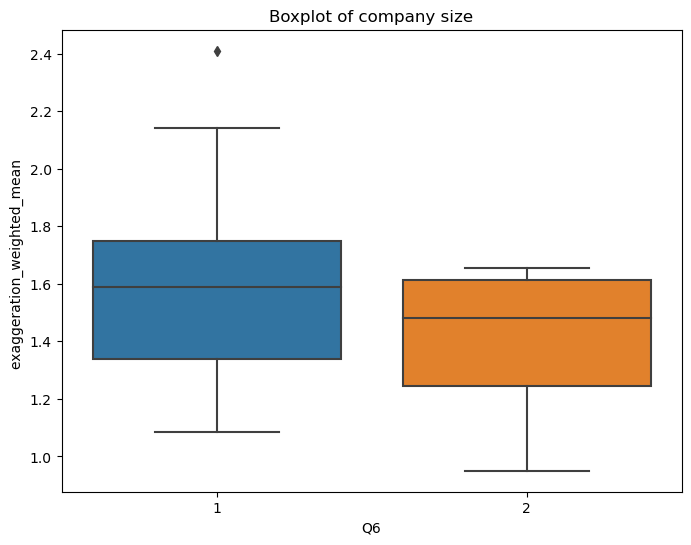

In [172]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Q6', y='exaggeration_weighted_mean', data=df)

# Add labels and a title
plt.xlabel('Q6')
plt.ylabel('exaggeration_weighted_mean ')
plt.title('Boxplot of company size')

# Show the boxplot
plt.show()

### Comparing differences between topics exaggeration score, with factor small/ big companies (Sven + Jelle)

In [177]:

# Drop NaNs from the original DataFrame
df_no_na = df.dropna(subset=['data_and_model_exaggeration_weighted', 'risk_management_exaggeration_weighted', 'user_application_exaggeration_weighted', 'model_monitoring_exaggeration_weighted', 'technical_documentation_exaggeration_weighted', 'Q6'])

# Reshape the DataFrame for use with OLS
df_melted = pd.melt(df_no_na, id_vars=['Q6'], value_vars=columns_of_interest, var_name='variable', value_name='value')

# Perform a two-way ANOVA
formula = 'value ~ C(Q6) + C(variable) + C(Q6):C(variable)'
model = ols(formula, data=df_melted).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display results
print("Two-Way ANOVA Results:")
print(anova_table)

# Interpretation of the result
alpha = 0.05
if any(anova_table['PR(>F)'] < alpha):
    print("A significant difference was found at the 95% confidence level.")
else:
    print("No significant difference was found at the 95% confidence") 

Two-Way ANOVA Results:
                      sum_sq    df          F        PR(>F)
C(Q6)               0.014412   1.0   0.053255  8.181664e-01
C(variable)        28.023335   4.0  25.887260  3.457480e-13
C(Q6):C(variable)   3.487610   4.0   3.221768  1.739381e-02
Residual           18.944004  70.0        NaN           NaN
A significant difference was found at the 95% confidence level.
